## 2.2 迷路内をランダムに探索させる

In [11]:
# 使用するパッケージの宣言
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


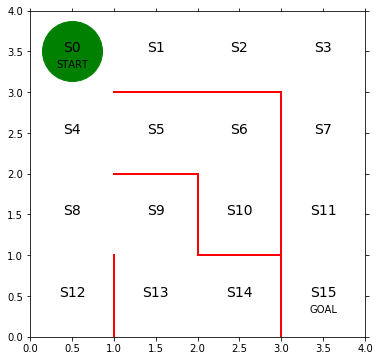

In [12]:
# 初期位置での迷路の様子

# 図を描く大きさと、図の変数名を宣言
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()

# 赤い壁を描く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)
#plt.plot([3, 1], [0, 0], color='blue', linewidth=2)
plt.plot([3, 3], [1, 0], color='red', linewidth=2)
plt.plot([3, 3], [1, 3], color='red', linewidth=2)
#plt.plot([1, 0], [1, 1], color='red', linewidth=2)
plt.plot([3, 1], [3, 3], color='red', linewidth=2)
# 状態を示す文字S0～S8を描く
plt.text(0.5, 3.5, 'S0', size=14, ha='center')
plt.text(1.5, 3.5, 'S1', size=14, ha='center')
plt.text(2.5, 3.5, 'S2', size=14, ha='center')
plt.text(3.5, 3.5, 'S3', size=14, ha='center')

plt.text(0.5, 2.5, 'S4', size=14, ha='center')
plt.text(1.5, 2.5, 'S5', size=14, ha='center')
plt.text(2.5, 2.5, 'S6', size=14, ha='center')
plt.text(3.5, 2.5, 'S7', size=14, ha='center')

plt.text(0.5, 1.5, 'S8', size=14, ha='center')
plt.text(1.5, 1.5, 'S9', size=14, ha='center')
plt.text(2.5, 1.5, 'S10', size=14, ha='center')
plt.text(3.5, 1.5, 'S11', size=14, ha='center')

plt.text(0.5, 0.5, 'S12', size=14, ha='center')
plt.text(1.5, 0.5, 'S13', size=14, ha='center')
plt.text(2.5, 0.5, 'S14', size=14, ha='center')
plt.text(3.5, 0.5, 'S15', size=14, ha='center')

plt.text(0.5, 3.3, 'START', ha='center')
plt.text(3.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off', right='off', left='off', labelleft='off')

# 現在地S0に緑丸を描画する
line, = ax.plot([0.5], [3.5], marker="o", color='g', markersize=60)

In [13]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0～7、列は移動方向で↑、→、↓、←を表す
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0 →↓
                    [np.nan, 1, np.nan, 1],  # s1→←
                    [np.nan, 1, np.nan, 1],  # s2→←
                    [1, np.nan, 1, 1],  # s3 　←↓
                    [1, 1, 1, np.nan],  # s4　↑→↓
                    [np.nan, 1, np.nan, 1],  # s5 
                    [np.nan, np.nan, 1, 1],  # s6
                    [1, np.nan,1, np.nan],  # s7、
                    [1, 1, 1, np.nan],  # s8
                    [np.nan, np.nan, 1, 1],  # s9
                    [1, np.nan, np.nan, np.nan],  # s10
                    [1, np.nan, 1, np.nan],  # s11
                    [1, np.nan, np.nan, np.nan],  # s12
                    [1,1, 1,np.nan],  # s13
                    [np.nan, np.nan, np.nan, 1],  # s14
                   
                    ])

In [14]:
# 方策パラメータtheta_0をランダム方策piに変換する関数の定義


def simple_convert_into_pi_from_theta(theta):
    '''単純に割合を計算する'''

    [m, n] = theta.shape  # thetaの行列サイズを取得
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])  # 割合の計算

    pi = np.nan_to_num(pi)  # nanを0に変換

    return pi

# ランダム行動方策pi_0を求める
pi_0 = simple_convert_into_pi_from_theta(theta_0)



In [15]:
# 初期の行動価値関数Qを設定

[a, b] = theta_0.shape  # 行と列の数をa, bに格納
Q = np.random.rand(a, b) * theta_0
# * theta0をすることで要素ごとに掛け算をし、Qの壁方向の値がnanになる


In [16]:
# ε-greedy法を実装


def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]

    # 行動を決める
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]

    # 行動をindexに
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action


def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 行動aの方向

    # 行動から次の状態を決める
    if next_direction == "up":
        s_next = s - 3  # 上に移動するときは状態の数字が3小さくなる
    elif next_direction == "right":
        s_next = s + 3  # 右に移動するときは状態の数字が1大きくなる
    elif next_direction == "down":
        s_next = s + 2  # 下に移動するときは状態の数字が3大きくなる
    elif next_direction == "left":
        s_next = s - 1  # 左に移動するときは状態の数字が1小さくなる

    return s_next

In [17]:
# Sarsaによる行動価値関数Qの更新


def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):

    if s_next == 8:  # ゴールした場合
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])

    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [18]:
# Sarsaで迷路を解く関数の定義、状態と行動の履歴および更新したQを出力


def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # スタート地点
    a = a_next = get_action(s, Q, epsilon, pi)  # 初期の行動
    s_a_history = [[0, np.nan]]  # エージェントの移動を記録するリスト

    while (1):  # ゴールするまでループ
        a = a_next  # 行動更新

        s_a_history[-1][1] = a
        # 現在の状態（つまり一番最後なのでindex=-1）に行動を代入

        s_next = get_s_next(s, a, Q, epsilon, pi)
        # 次の状態を格納

        s_a_history.append([s_next, np.nan])
        # 次の状態を代入。行動はまだ分からないのでnanにしておく

        # 報酬を与え,　次の行動を求めます
        if s_next == 8:
            r = 1  # ゴールにたどり着いたなら報酬を与える
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 次の行動a_nextを求めます。

        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 8:  # ゴール地点なら終了
            break
        else:
            s = s_next

    return [s_a_history, Q]


In [24]:
# Sarsaで迷路を解く

eta = 0.1  # 学習率
gamma = 0.9  # 時間割引率
epsilon = 0.5  # ε-greedy法の初期値
v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
is_continue = True
episode = 1

while is_continue:  # is_continueがFalseになるまで繰り返す
    print("エピソード:" + str(episode))

    # ε-greedyの値を少しずつ小さくする
    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを求める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1)  # 状態ごとに価値の最大値を求める
    print(np.sum(np.abs(new_v - v)))  # 状態価値の変化を出力
    v = new_v

    print("迷路を解くのにかかったステップ数は" + str(len(s_a_history) - 1) + "です")

    # 100エピソード繰り返す
    episode = episode + 1
    if episode > 100:
        break


エピソード:1
0.05421384010278152
迷路を解くのにかかったステップ数は5です
エピソード:2
0.00030592322428557583
迷路を解くのにかかったステップ数は5です
エピソード:3
0.00028635398597620654
迷路を解くのにかかったステップ数は5です
エピソード:4
0.00026793654457635263
迷路を解くのにかかったステップ数は5です
エピソード:5
0.00025061136889370506
迷路を解くのにかかったステップ数は5です
エピソード:6
0.00023432135989343017
迷路を解くのにかかったステップ数は5です
エピソード:7
0.00021901179515571023
迷路を解くのにかかったステップ数は5です
エピソード:8
0.00020463027299566505
迷路を解くのにかかったステップ数は5です
エピソード:9
0.00019112665589393618
迷路を解くのにかかったステップ数は5です
エピソード:10
0.00017845301303009986
迷路を解くのにかかったステップ数は5です
エピソード:11
0.00016656356182820353
迷路を解くのにかかったステップ数は5です
エピソード:12
0.0001554146085089858
迷路を解くのにかかったステップ数は5です
エピソード:13
0.00014496448771283976
迷路を解くのにかかったステップ数は5です
エピソード:14
0.00013517350130654027
迷路を解くのにかかったステップ数は5です
エピソード:15
0.000126003856521395
迷路を解くのにかかったステップ数は5です
エピソード:16
0.00011741960360134307
迷路を解くのにかかったステップ数は5です
エピソード:17
0.00010938657314352174
迷路を解くのにかかったステップ数は5です
エピソード:18
0.00010187231332892122
迷路を解くのにかかったステップ数は5です
エピソード:19
9.484602724074698e-05
迷路を解くのにかかったステップ数は5です
エピソード:20


In [27]:
# エージェントの移動の様子を可視化します
# 参考URL http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
from matplotlib import animation
from IPython.display import HTML


def init():
    '''背景画像の初期化'''
    line.set_data([], [])
    return (line,)


def animate(i):
    '''フレームごとの描画内容'''
    state = s_a_history[i][0]  # 現在の場所を描く
    x = (state % 4) + 0.5  # 状態のx座標は、3で割った余り+0.5
    y = 3.5 - int(state / 4)  # y座標は3で割った商を2.5から引く
    line.set_data(x, y)
    return (line,)


#　初期化関数とフレームごとの描画関数を用いて動画を作成する
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(
    s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())
